# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. 
# To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities. 
# Your first requirement is to create a series of scatter plots to showcase the following relationships:

#     Temperature (C) vs. Latitude
#     Humidity (%) vs. Latitude
#     Cloudiness (%) vs. Latitude
#     Wind Speed (kph) vs. Latitude

# After each plot add a sentence or too explaining what the code is and analyzing. Your second requirement is to run linear regression on each relationship, 
# only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

#     Northern Hemisphere - Temperature (C) vs. Latitude
#     Southern Hemisphere - Temperature (C) vs. Latitude
#     Northern Hemisphere - Humidity (%) vs. Latitude
#     Southern Hemisphere - Humidity (%) vs. Latitude
#     Northern Hemisphere - Cloudiness (%) vs. Latitude
#     Southern Hemisphere - Cloudiness (%) vs. Latitude
#     Northern Hemisphere - Wind Speed (kph) vs. Latitude
#     Southern Hemisphere - Wind Speed (kph) vs. Latitude

# After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

# Your final notebook must:

#     Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#     Perform a weather check on each of the cities using a series of successive API calls.
#     Include a print log of each city as it's being processed with the city number and city name.
#     Save a CSV of all retrieved data and a PNG image for each scatter plot.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

## Generate Cities List

In [4]:
# randomly generate a list of 600 longitudes & then a list of 600 latitudes, combine them, put them 

In [5]:
#Generating the random list of lat and lon:
# Latitude and longitude are a pair of numbers (coordinates) used to describe a position on the plane of a geographic coordinate system. 
# The numbers are in decimal degrees format and range from -90 to 90 for latitude and -180 to 180 for longitude.
lat = np.random.uniform(low=-90.000, high=90.000, size=600)
lon = np.random.uniform(low=-180.000, high=180.000, size=600)

In [6]:
# make the lists into a dataframe
lat_and_long_df = pd.DataFrame({"lat": lat, "lon": lon})
lat_and_long_df

,lat,lon
0,-6.102484,-90.105415
1,89.584634,126.023208
2,-28.792392,-129.825637
3,-68.387468,57.042078
4,35.744020,-25.721321
...,...,...
595,42.050016,125.694939
596,-76.467794,-137.937451
597,-34.623922,-85.929927
598,-65.274435,-8.115993


In [7]:
# Put the lat and long into the google maps api and then search for the nearest city.
# when we find these 'nearest cities', put those names through the api to retrieve their longs & lats.
# add the 'nearest city' long and lats to the dataframe and then delete the original randomly generated longs and lats.
# remove any duplicates (thats why we grab 600, to alow for removing duplicate 'nearest cities' and still have over 500)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# sos

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# because I wasnt able to com,plete the first section, I've drafted the other parts of the assessment on the example csv provided. 
# I'll change the csv later when i have created my own from the google API task.

draft_cities_df_path = "Resources/global_power_plant_database.csv"
draft_cities_df = pd.read_csv("../output_data/cities.csv")
draft_cities_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
draft_cities_df = draft_cities_df[draft_cities_df["Humidity"] <=100]
draft_cities_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [11]:
#  Get the indices of cities that have humidity over 100%.
draft_cities_df[draft_cities_df["Humidity"] > 100].index


Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
clean_city_data_draft = draft_cities_df.drop(draft_cities_df[draft_cities_df["Humidity"] > 100].index, inplace=False)

clean_city_data_draft

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs Max Temp')

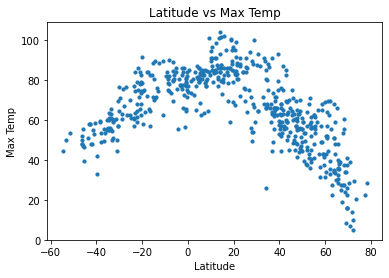

In [14]:
#I WILL NEED TO CHANGE THE UNIT OF MEASURE WHEN I GET MY OWN DATA TO DEGREES CELCIUS

plt.scatter(clean_city_data_draft["Lat"], clean_city_data_draft["Max Temp"], s=10)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")


## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs Humidity')

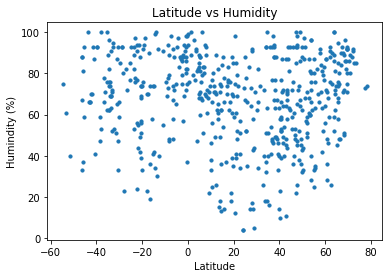

In [15]:
plt.scatter(clean_city_data_draft["Lat"], clean_city_data_draft["Humidity"], s=10)
plt.xlabel("Latitude")
plt.ylabel("Humindity (%)")
plt.title("Latitude vs Humidity")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs Cloudiness')

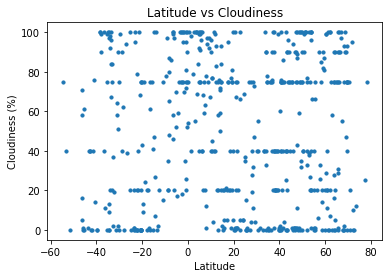

In [19]:
plt.scatter(clean_city_data_draft["Lat"], clean_city_data_draft["Cloudiness"], s=10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs Wind Speed')

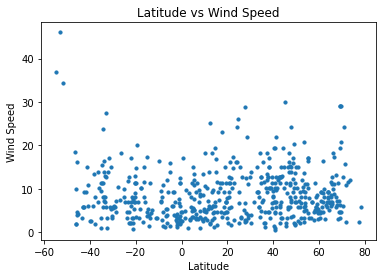

In [17]:
# i will need to find windspeed unit of measure

plt.scatter(clean_city_data_draft["Lat"], clean_city_data_draft["Wind Speed"], s=10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression